In [327]:
# importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [315]:
df = pd.read_csv('CC GENERAL.csv') #importing csv file
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [316]:
df = df.drop(['CUST_ID'], axis=1)   #removing categorical column
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [317]:
df.isnull().sum()     #check null values

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [318]:
# replacing null values
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [319]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [329]:
# Apply StandardScaler() and normalize() functions to scale and normalize raw input data

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

sc = StandardScaler()
X_scale = sc.fit_transform(X)

X_norm = preprocessing.normalize(X_scale)

In [330]:
# performing PCA with k = 2
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_norm)   # pca is applied on the data set without output labels
# creating a data frame for the pca results
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-0.488186,-0.677233,12
1,-0.517294,0.556075,12
2,0.334384,0.287313,12
3,-0.486617,-0.080780,12
4,-0.562175,-0.474770,12


In [335]:
# Apply Agglomerative Clustering with k=2

ac = AgglomerativeClustering(n_clusters = 2)
ac_clusters = ac.fit_predict(principalDf)

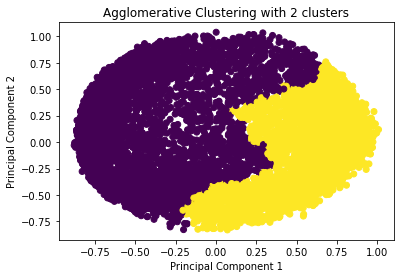

In [336]:
# visualize result using scatter plot
plt.scatter(principalDf.values[:,0], principalDf.values[:,1], c=ac_clusters)
plt.title("Agglomerative Clustering with 2 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [337]:
# Apply Agglomerative Clustering with k=3
ac1 = AgglomerativeClustering(n_clusters = 3)
ac_clusters1 = ac1.fit_predict(principalDf)

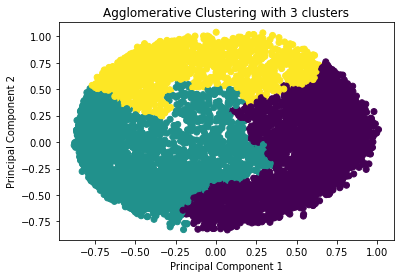

In [338]:
# visualize result using scatter plot
plt.scatter(principalDf.values[:,0], principalDf.values[:,1], c=ac_clusters1)
plt.title("Agglomerative Clustering with 3 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [339]:
# Apply Agglomerative Clustering with k = 4
ac2 = AgglomerativeClustering(n_clusters = 4)
ac_clusters2 = ac2.fit_predict(principalDf)

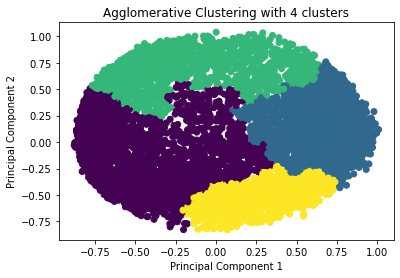

In [340]:
# visualize result using scatter plot
plt.scatter(principalDf.values[:,0], principalDf.values[:,1], c=ac_clusters2)
plt.title("Agglomerative Clustering with 4 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [341]:
# Apply Agglomerative Clustering with k = 5 
ac3 = AgglomerativeClustering(n_clusters = 5)
ac_clusters3 = ac3.fit_predict(principalDf)

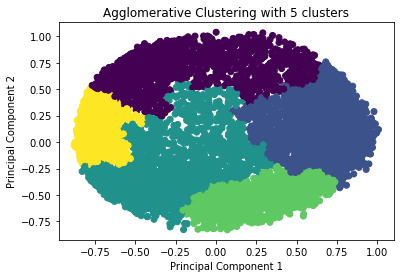

In [342]:
# visualize result using scatter plot
plt.scatter(principalDf.values[:,0], principalDf.values[:,1], c=ac_clusters3)
plt.title("Agglomerative Clustering with 5 clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [343]:
# finding silhouette scores depending on the no of clusters
print('Silhouette-Score for', 2,  'Clusters: ', silhouette_score(principalDf, ac_clusters))
print('Silhouette-Score for', 3,  'Clusters: ', silhouette_score(principalDf, ac_clusters1))
print('Silhouette-Score for', 4,  'Clusters: ', silhouette_score(principalDf, ac_clusters2))
print('Silhouette-Score for', 5,  'Clusters: ', silhouette_score(principalDf, ac_clusters3))

Silhouette-Score for 2 Clusters:  0.40418007711697673
Silhouette-Score for 3 Clusters:  0.4142053398654851
Silhouette-Score for 4 Clusters:  0.3698251097931532
Silhouette-Score for 5 Clusters:  0.32839641201964814


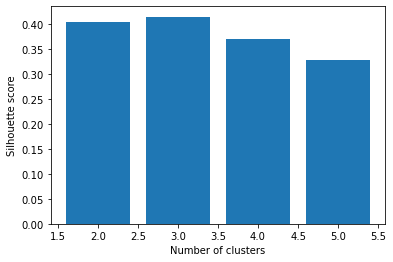

In [346]:
#  using Silhouette Scores and Visualize results with a bar chart.

k = [2, 3, 4, 5]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(principalDf, ac_clusters))
silhouette_scores.append(silhouette_score(principalDf, ac_clusters1))
silhouette_scores.append(silhouette_score(principalDf, ac_clusters2))
silhouette_scores.append(silhouette_score(principalDf, ac_clusters3))

 
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()